<img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">

# ILI285/INF285 Computación Científica
## Scientific Computing Team
## Departamento de Informática
## Universidad Técnica Federico Santa María
### ¿Cómo se puede aproximar $x=\sqrt{2}$?
#### 09/04/2020 v0.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(x, y, xi = None, yi = None):
    y = f(x)
    plt.plot(x, f(x), label=r"$f(x)$")
    if xi is not None and yi is not None:
        plt.plot(xi, yi, 'ro', label='sol', markersize=14)
    plt.grid(True)
    plt.xlabel(r"$x$", fontsize=16)
    plt.ylabel(r"$f(x)$", fontsize=16)
    plt.legend()
    plt.show()

In [3]:
def errorIteraciones(val):
    plt.plot(np.abs(np.diff(val)), '.')
    plt.yscale('log')
    plt.grid(True)
    plt.ylabel(r"$|x_{i+1} - x_i|$", fontsize=16)
    plt.xlabel("Iteraciones", fontsize=16)
    plt.show()

Haciendo un manejo algebraico básico, podemos reescribir el problema de la siguiente manera:
\begin{equation}
    \begin{split}
        x & = \sqrt{2} \quad /()^2 \\
        x^2 & = 2 \\
        x^2 - 2 &= 0.
    \end{split}
\end{equation}

Definiendo $f(x) = x^2- 2$, el objetivo es encontrar un $x_r$ tal que $f(x_r)=0$.

In [4]:
f = lambda x: x ** 2 - 2

In [5]:
Nx = 100
x_ = np.linspace(0, 3, Nx)

## Gráfica de la función que nos ayudará a conseguir la aproximación

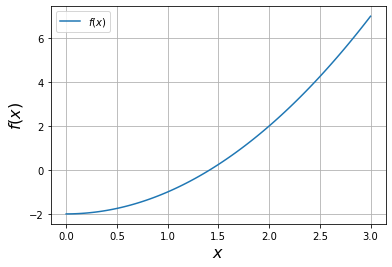

In [6]:
plot(x_, f(x_))

## "Mi primer algoritmo"

Un algoritmo 'naive' sería probar distintos valores de $x$ hasta que $f(x)=0$. Podemos disminuir la cantidad de valores de prueba pensando el intervalo en el que tiene sentido nuestra búsqueda, de esta forma se puede restringir a $x\in ]1, 2[$.

In [7]:
def naive1(a, b, f, TOL = 1e-3):
    dx = 0.01
    x = a
    sol = [x]
    flag = True
    while flag:
        y = f(x)

        if abs(y) <= TOL:
            flag = False
        elif x > b:
            x = a
            dx /= 10
        else:
            x += dx
        
        sol.append(x)

    return np.array(sol)

In [8]:
xf1 = naive1(1, 2, f)

In [9]:
len(xf1)

517

Aproximadamente $517$ iteraciones para alcanzar la tolerancia definida. No es para nada eficiente. Si me alejo de la solución, simplemente estoy empezando la búsqueda de nuevo pero con una mayor resolución de puntos.

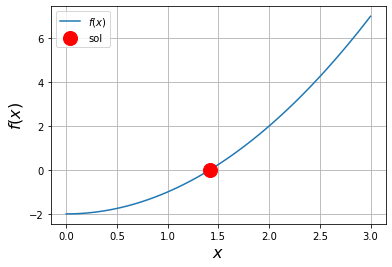

In [10]:
plot(x_, f(x_), xf1[-1], f(xf1[-1]))

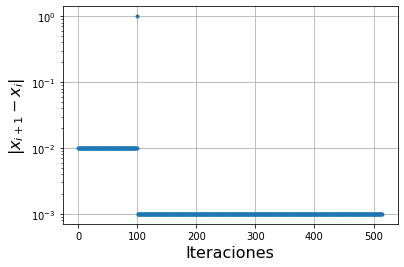

In [11]:
errorIteraciones(xf1)

## "Naive" 2

Una versión un poquito más "inteligente". Notamos que hay un cambio de signo en $f(x)$ según si estamos a la derecha o a la izquierda de la solución. Con esto, evitamos realizar toda la búsqueda desde el principio.

In [12]:
def naive2(a, b, f, n_iter=50):
    dx = 0.01
    x = np.zeros(n_iter + 1)
    x[0] = a

    # Para guardar el valor antiguo. Se inicia en -1 porque partimos 
    # buscando desde la izquierda y f(x) será negativo en esa parte
    y_old = -1 
    
    for i in range(n_iter):
        y = f(x[i])

        # Si detectamos un cambio de signo (pasamos a la derecha o izquierda de la solucion)
        if y_old * y < 0:
            dx = -dx/10 # Se cambia la dirección de busqueda y se reduce la distancia de busqueda

        y_old = y # Se guarda el valor anterior para revisar el cambio de signo

        x[i+1] = x[i] + dx # Siguiente numero a probar

    return x

In [13]:
xf2 = naive2(1, 2, f, 100)

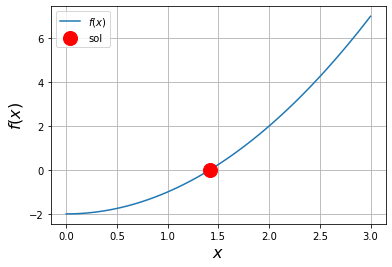

In [14]:
plot(x_, f(x_), xf2[-1], f(xf2[-1]))

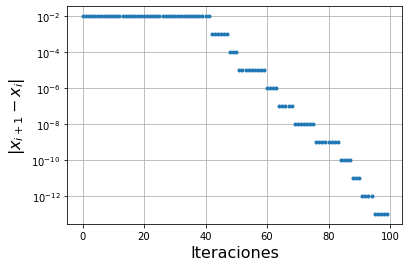

In [15]:
errorIteraciones(xf2)

Se disminuye notablemente el número de interaciones en comparación a la primera versión.

## Algoritmos más eficientes que veremos en el curso

## Bisección

Se basa en la división del dominio de búsqueda de manera que en cada iteración este se reduce a la mitad.

In [16]:
def biseccion(a, b, f, n_iter=50):
    x = np.zeros(n_iter)
    for i in range(n_iter):
        c = (a + b) / 2
        x[i] = c
        if f(c) == 0:
            break
        if f(a) * f(c) < 0:
            b = c
        else: 
            a = c
    return x

In [17]:
a, b = 1, 2
xb = biseccion(a, b, f)

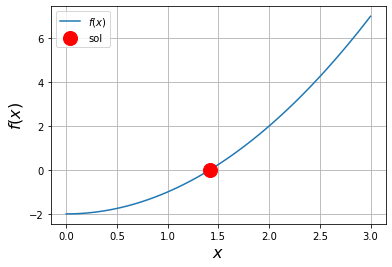

In [18]:
plot(x_, f(x_), xb[-1], f(xb[-1]))

## Error absoluto vs iteraciones

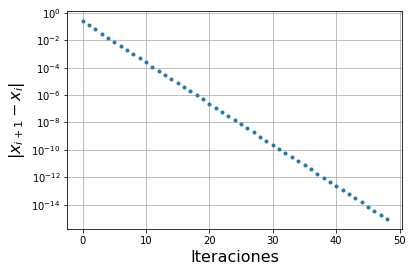

In [19]:
errorIteraciones(xb)

Aproximadamente $45$ iteraciones para alcanzar a solución.

## Newton-Raphson

Basado en una expansión en Series de Taylor, este algoritmo requiere el cálculo de la derivada de la función con la que estamos trabajando.

In [20]:
fd = lambda x: 2 * x # f'(x)

In [21]:
def newton(f, fd, x0, n_iter=10):
    x = np.zeros(n_iter + 1)
    x[0] = x0
    for i in range(n_iter):
        x[i+1] = x[i] - f(x[i]) / fd(x[i])
    return x

In [22]:
x0 = 1
xn = newton(f, fd, x0)

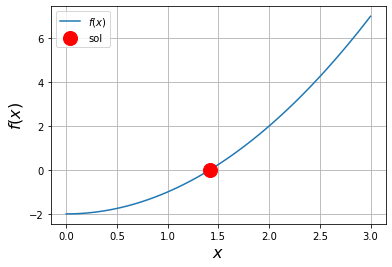

In [23]:
plot(x_, f(x_), xn[-1], f(xn[-1]))

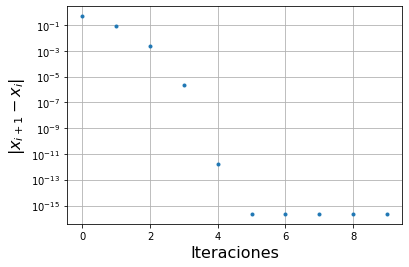

In [24]:
errorIteraciones(xn)

Aproximadamente $6$ iteraciones para alcanzar a solución.

## Comparación de errores entre los métodos

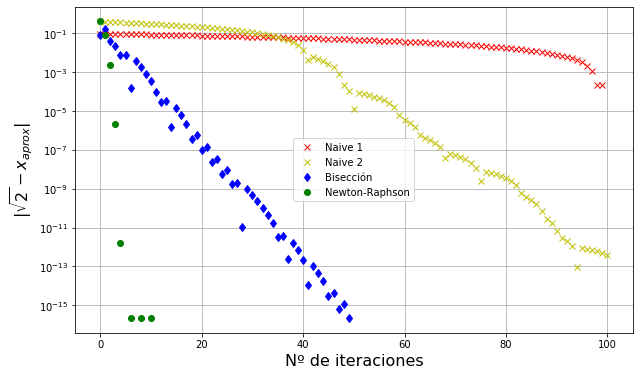

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(np.abs(np.sqrt(2) - xf1[-100:]), 'rx', label="Naive 1") # Solo las ultimas 100 iteraciones
plt.plot(np.abs(np.sqrt(2) - xf2), 'yx', label="Naive 2")
plt.plot(np.abs(np.sqrt(2) - xb), 'bd', label="Bisección")
plt.plot(np.abs(np.sqrt(2) - xn), 'go', label="Newton-Raphson")
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.xlabel("Nº de iteraciones", fontsize=16)
plt.ylabel(r"$|\sqrt{2} - x_{aprox}|$", fontsize=16)
plt.show()

# Referencias

* Apuntes del curso Computación Científica
* Raíces de ecuaciones en $1$D, https://github.com/tclaudioe/Scientific-Computing/blob/master/SC1/04_roots_of_1D_equations.ipynb
* *NumPy*, https://numpy.org/
* *Matplotlib*, https://matplotlib.org/